# 4- Gage Repeatability Analysis

## 4.1- R Gage analysis (no tolerance example)

### 4.1.1- Introduction

This data cames from an automatic measurement system where reproducibility doesn't add variability to the measurement process

### 4.1.2- STEP 1: Get the measurement

In [1]:
from pypetb import Repeatability
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set seaborn style to improve the figure sight
sns.set()

# Load measurement dataset
url = 'https://raw.githubusercontent.com/markwkiehl/public_datasets/main/GR%26R%206_28_24%20perp1.csv' # noqa
df=pd.read_csv(url,sep=';')
print(df.info()) # In order to check column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Operator     90 non-null     object 
 1   Part         90 non-null     int64  
 2   Trial        90 non-null     int64  
 3   Measurement  90 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ KB
None


### 4.1.3- STEP 2: Make all calculation calling .RSolve()

In [2]:
#Build up the model
dict_key={'1':'Part','2':'Measurement'}
RModel=Repeatability.RNumeric(
    mydf_Raw=df,
    mydict_key=dict_key
    )
#Solve it
RModel.RSolve()
#Check the calculation
print(RModel.getLog())

Model is created
== DATASET EVALUATION ==
Trials: 3
Piezes: 30
== CALCULATION ==
Total data: 90
Max. measured value: 0.1720
Min. measured value: 0.0060
Avg. measured value: 0.0552
Avg. Control limits
UCL: 0.0732
LCL: 0.0372
Avg. Range measured: 0.0096
Range Control limits
UCL: 0.0312
LCL: 0.0000
Sum of deviation by part: 0.055515
Total Part Sum of deviation: 0.166546
Total squared deviation: 0.168558
Equipment squared deviation: 0.002012



### 4.1.4- STEP 3: Check Anova Result

Anova calculation is implemented into other python package. The only different
here is that result is obtained as pandas dataframe and each parameter could
be accesed using its column and index for further calculations

In [3]:
df_Result=RModel.RAnova()
#Checking Anova table
print(df_Result)
#accesing one individual value
print(f"Degree of freedom for part: {df_Result['DF'].loc['Part']}")

                       DF        SS        MS
Source of variability                        
Part                   29  0.166546  0.005743
Repeatability with     60  0.002012  0.000034
Repeatability without  60  0.002012  0.000034
Total                  89  0.168558       NaN
Degree of freedom for part: 29


### 4.1.5- STEP 4: Variance table

Table that summarize the impact of each parameter to the variance.
It helps a lot to find where the effort must be focused

In [4]:
df_Result=RModel.R_varTable()
#Checking var. table
print(df_Result)
#accesing one individual value
print('\nRepeatability RESULT:\n-------------------')

dbl_RnR=df_Result['% Contribution'].loc['Gage Repeatability']
print(f"Total Gage R&R: {dbl_RnR:.3f}")
if dbl_RnR<1:
    print('<1% --> Acceptable measurement system')
elif dbl_RnR>=1 and dbl_RnR<=9:
    print(
        '1-9%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>9% --> Unacceptable measurement system, it must be improved'
        )

                    Variance  % Contribution
Source                                      
Gage Repeatability  0.000034        1.721556
Part to Part        0.001914       98.278444
Total variation     0.001948      100.000000

Repeatability RESULT:
-------------------
Total Gage R&R: 1.722
1-9%--> It may be acceptable depending on application and cost


### 4.1.6- STEP 5: Standard Deviation table

Table that summarize the impact of each parameter to the standard deviation.
It helps a lot to find where the effort must be focused

In [5]:
df_Result=RModel.R_SDTable()
#Checking sd table
print(df_Result)
#accesing one individual value
print('\nAutomotive Industry Action Group (AIAG) measurement system assessment:\n-------------------')

dbl_R=df_Result['% Study Var'].loc['Gage Repeatability']
print(f"Total Gage Repeatability factor: {dbl_R:.3f}")
if dbl_R<10:
    print('<10% --> Acceptable measurement system')
elif dbl_R>=10 and dbl_R<=30:
    print(
        '10-30%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>30% --> Unacceptable measurement system, it must be improved'
        )

                    StdDev (SD)  StudyVar (6*SD)  % Study Var
Source                                                       
Gage Repeatability     0.005791         0.034745    13.120809
Part to Part           0.043753         0.262517    99.135485
Total variation        0.044134         0.264807   100.000000

Automotive Industry Action Group (AIAG) measurement system assessment:
-------------------
Total Gage Repeatability factor: 13.121
10-30%--> It may be acceptable depending on application and cost


### 4.1.7- STEP 6: Check the run chart

This chart summaryze all the measurement by part and operator, so in case of big difference, it makes easier find what could be the source

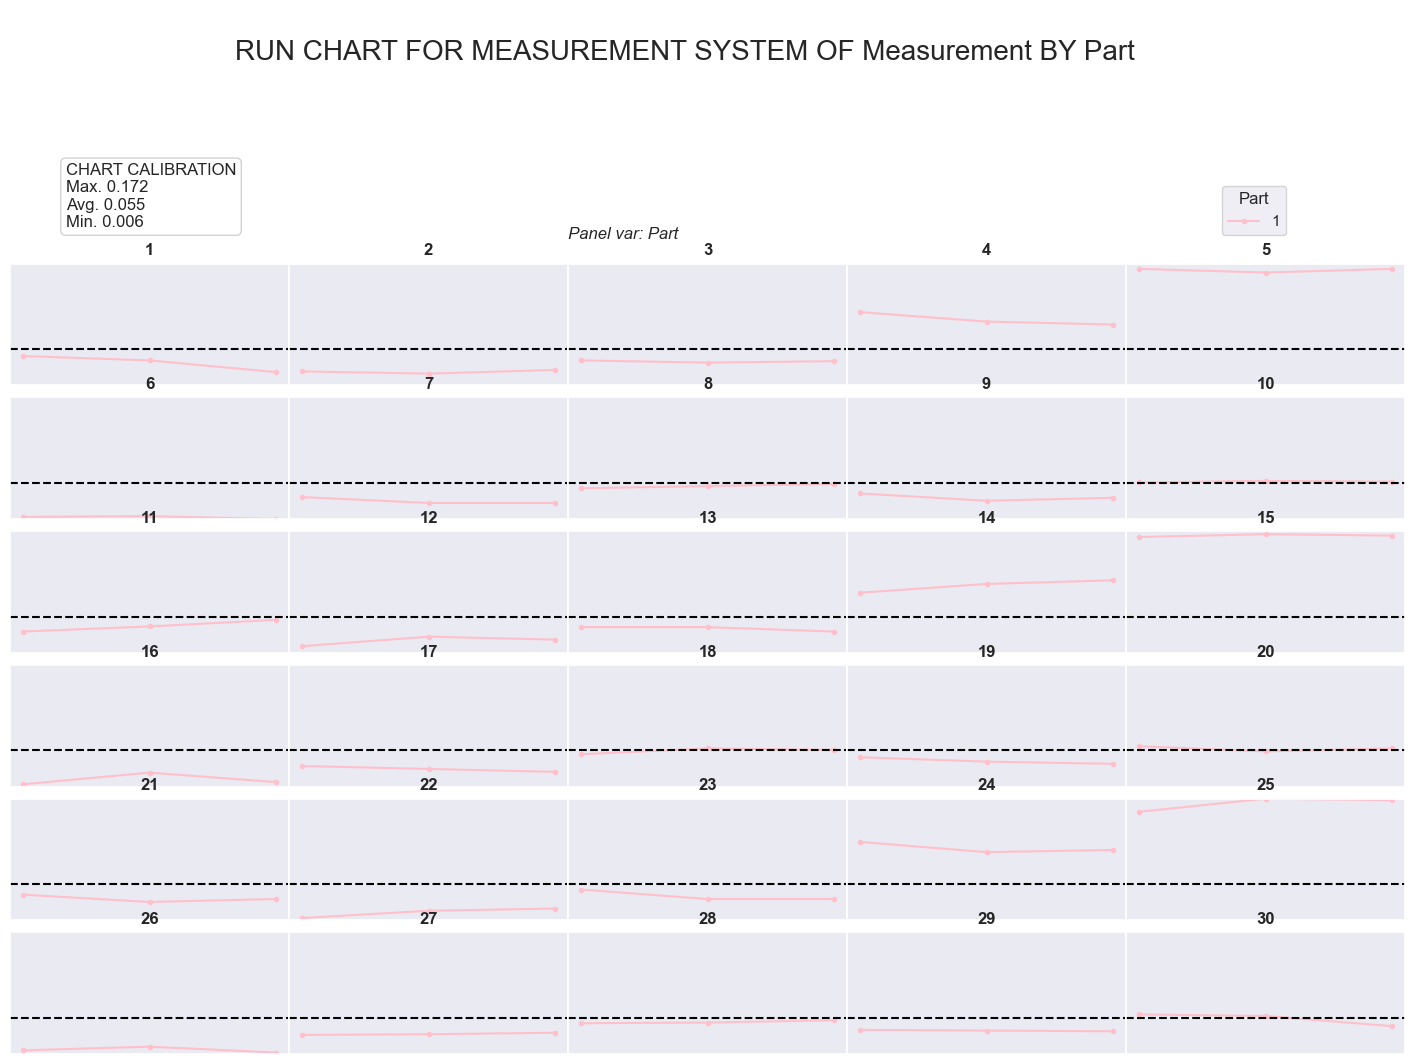

In [6]:
call=RModel.R_RunChart()
plt.show()

### 4.1.8- STEP 7: Check the final report

This figure is a mix of chart that will help to find where to be focused in case of being out the recommended limits

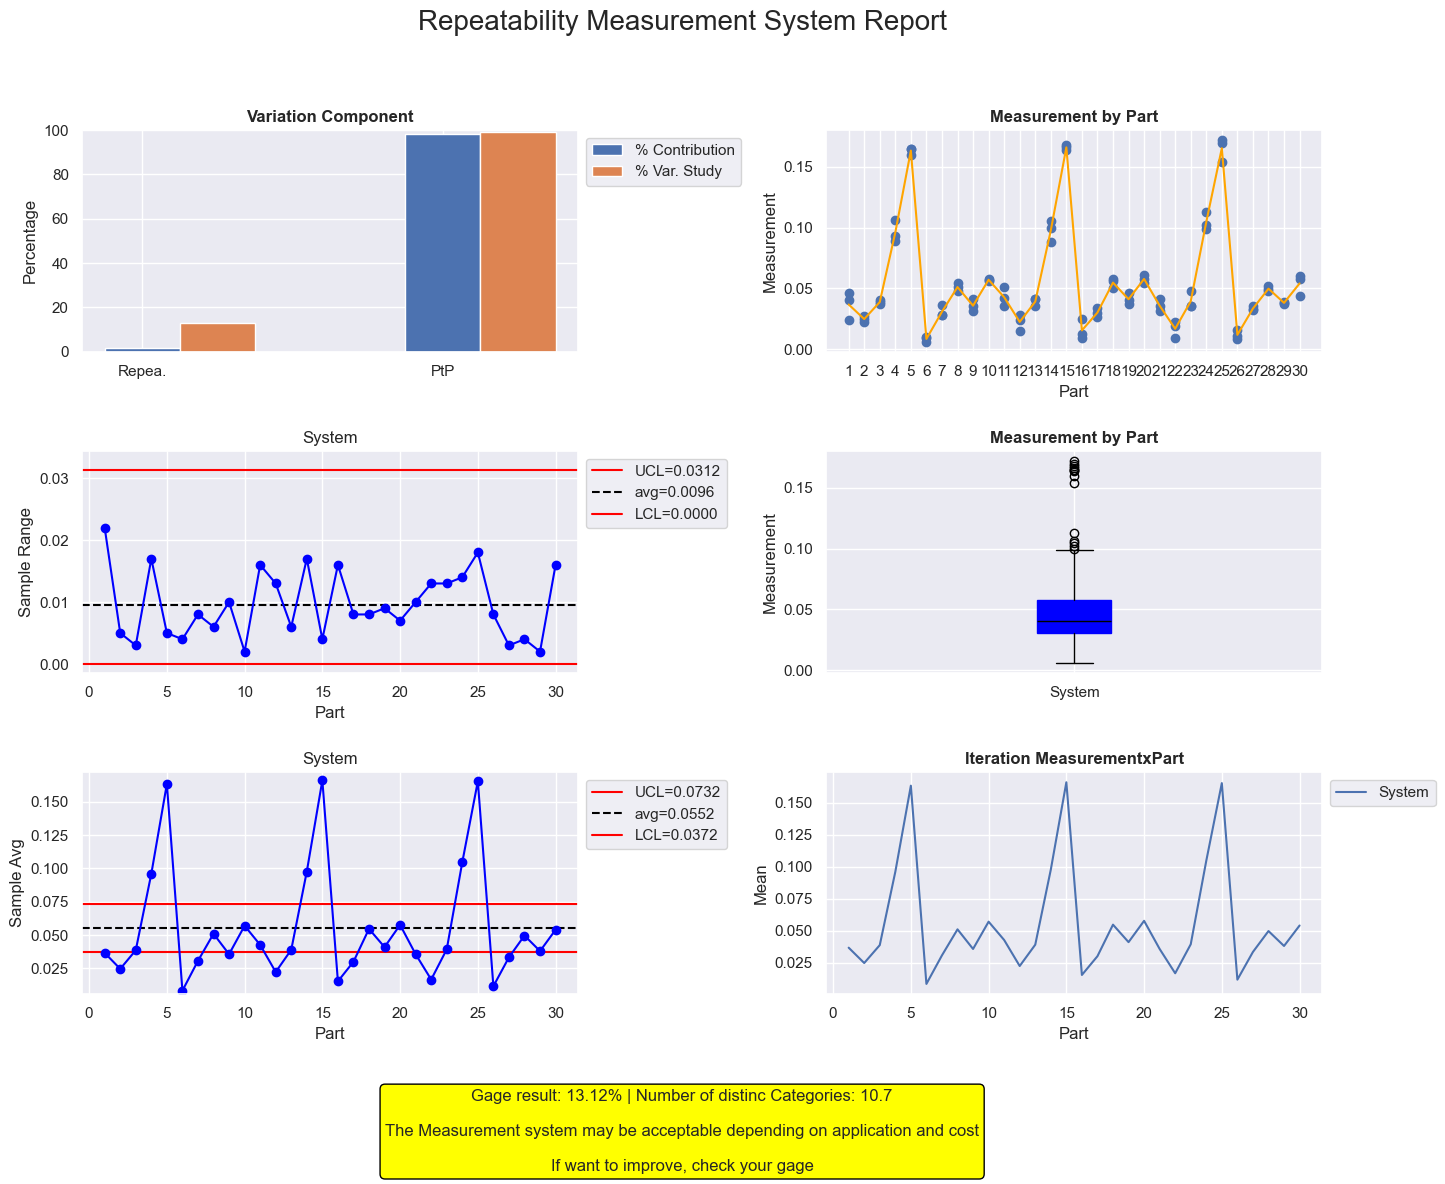

In [7]:
call=RModel.R_Report()
plt.show()